In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import os
import tvb_model_reference.src.nuu_tools_simulation_human as tools

folder_root_local = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results/'
folder_root_jusuf = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_jusuf/'

# Compare the time-traces of the HPC simulation and Local

4.098030215078082e-05
8.913021172348906e-05


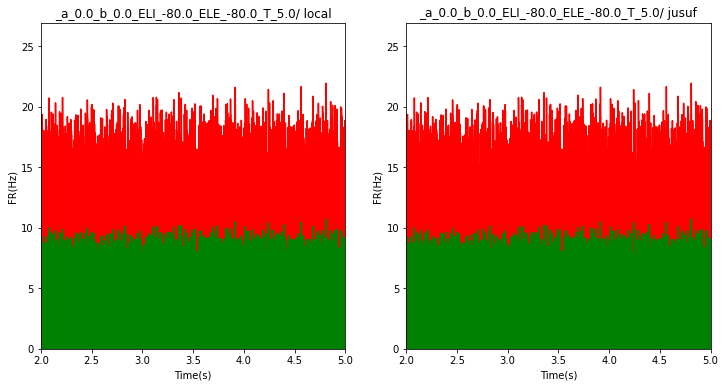

5.754853522542099e-06
1.2555017951247941e-05


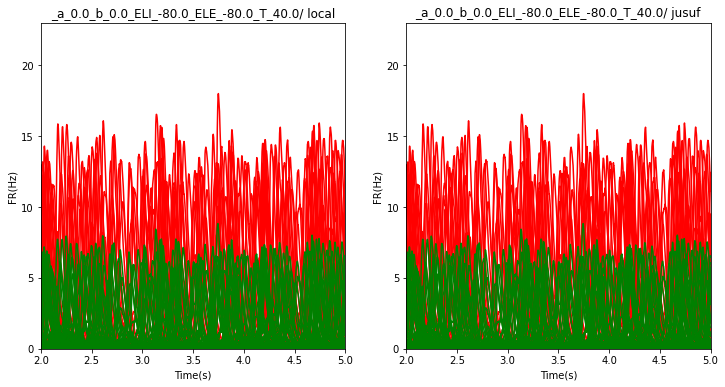

2.3529419351575598e-05
4.134088065299579e-05


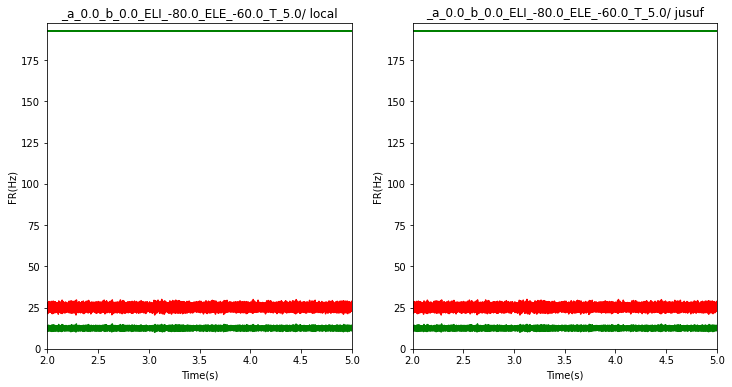

3.395828903407505e-06
5.3764841645431716e-06


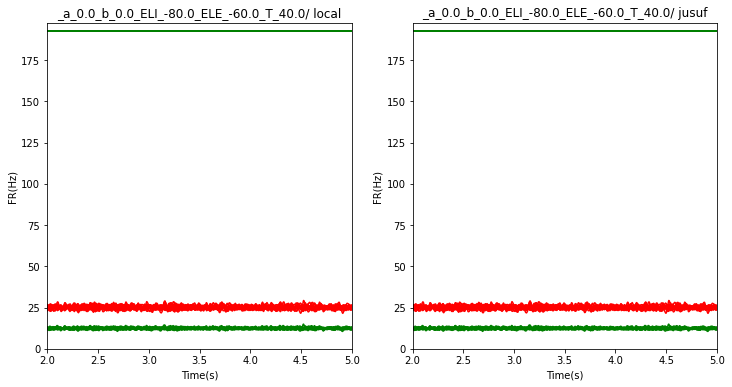

3.356538279880258e-11
2.843550766506715e-08


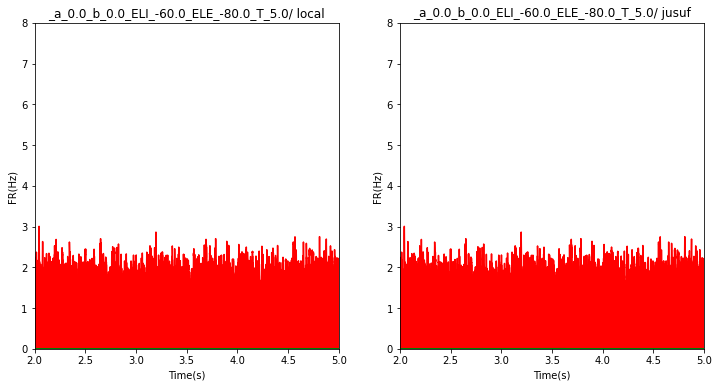

2.757493565185346e-10
3.3744352000153466e-08


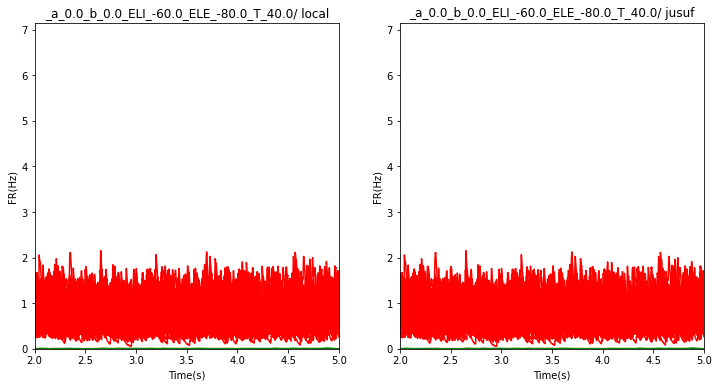

0.00024722377680527454
0.0005330472114442283


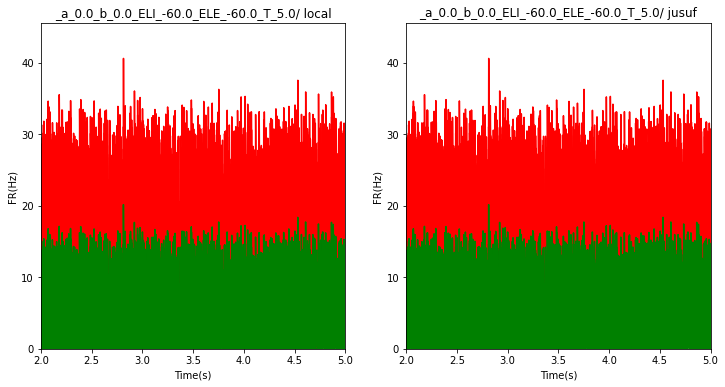

1.2083813594410131e-05
2.6256408621527783e-05


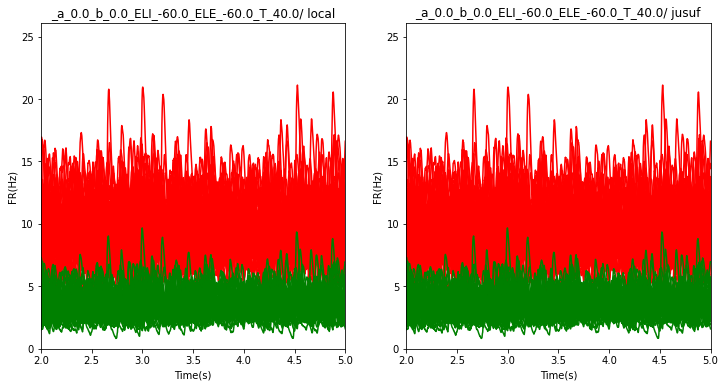

4.474681068026806e-06
9.791425636318676e-06


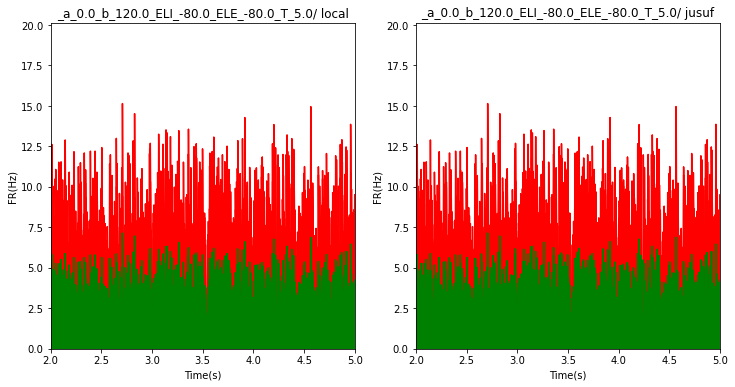

4.1410135369498134e-07
8.498897617458673e-07


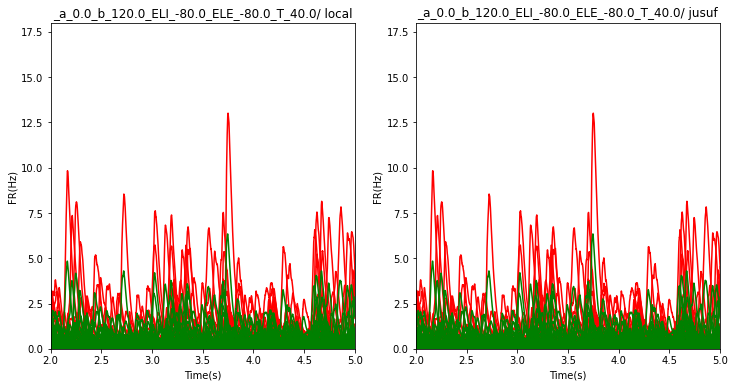

0.02611089511020739
0.04817857732622533


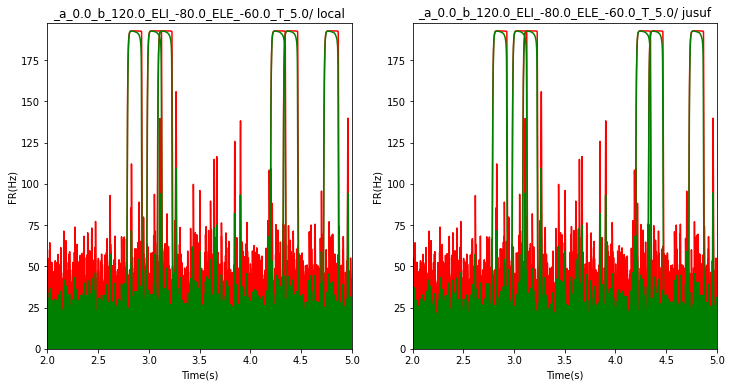

5.28400619670281
8.794755631980275


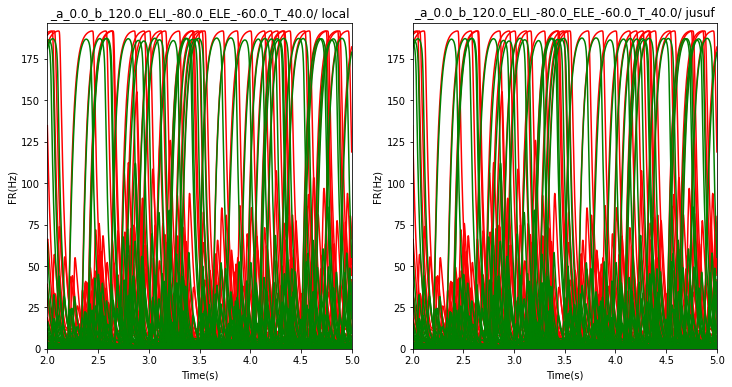

3.530999208210189e-11
2.8413110136316327e-08


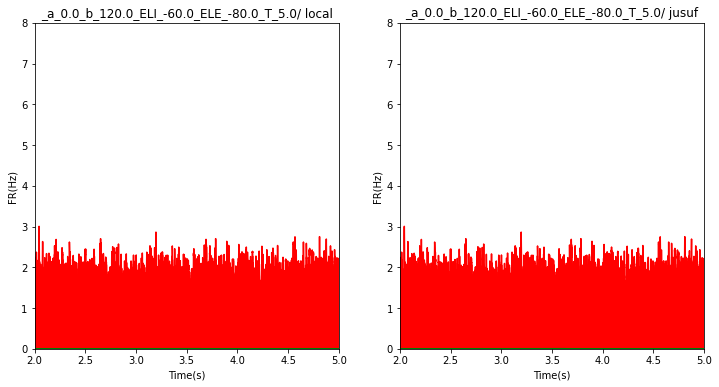

2.795862353702135e-10
3.478493600800325e-08


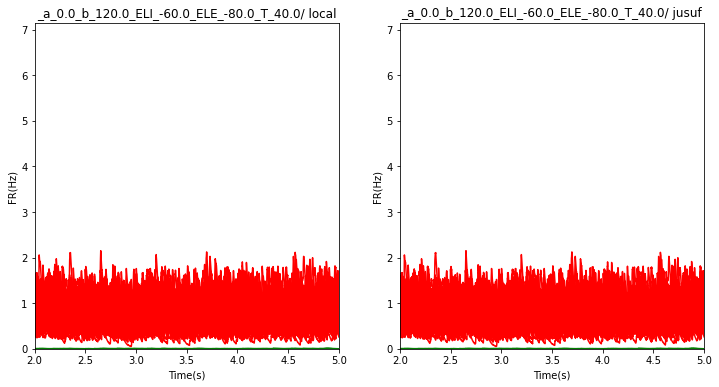

1.8908926189027686e-05
4.660216745849928e-05


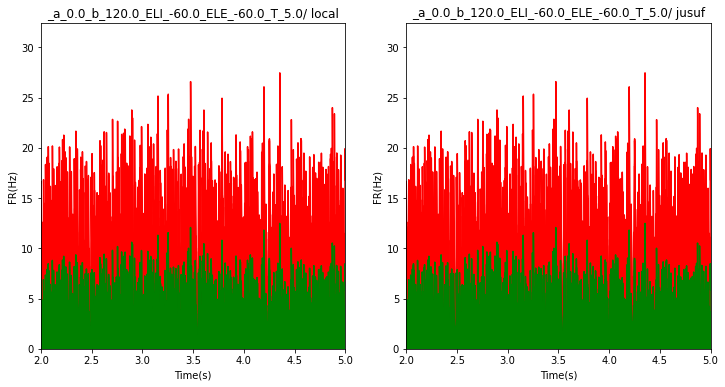

8.82641227103716e-06
2.219428338387508e-05


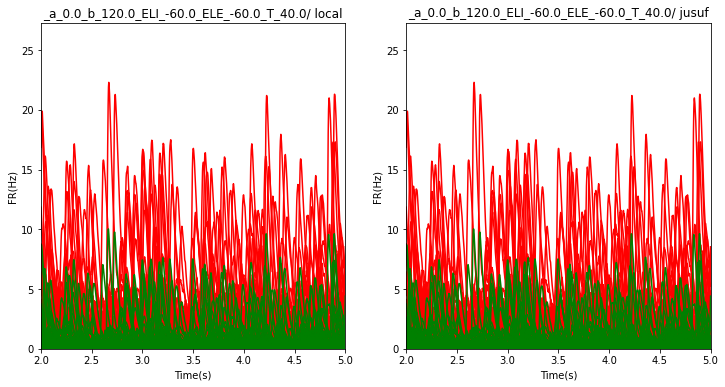

0.03875550685567747
0.09832701712600368


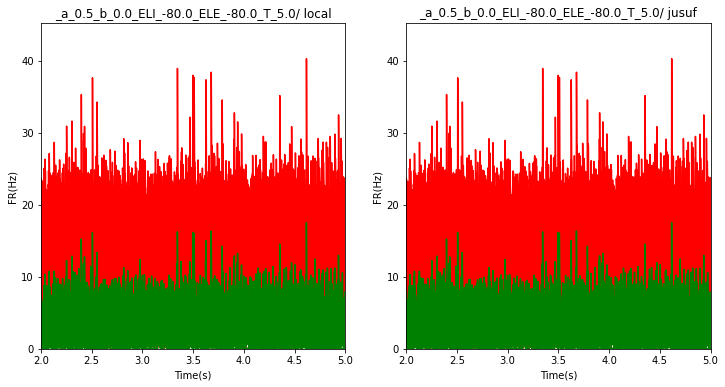

0.01097845289323875
0.030267601025563036


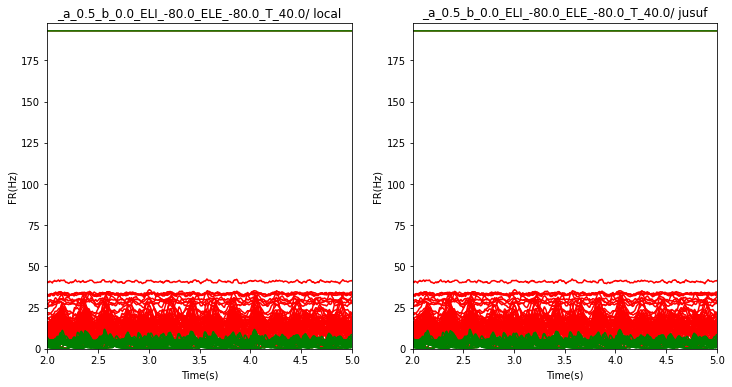

3.972305573363144e-07
8.681151300038437e-07


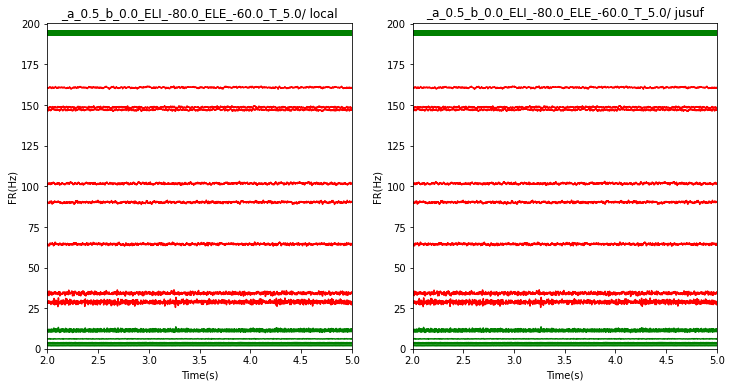

7.34480742892174e-08
1.2856097697522273e-07


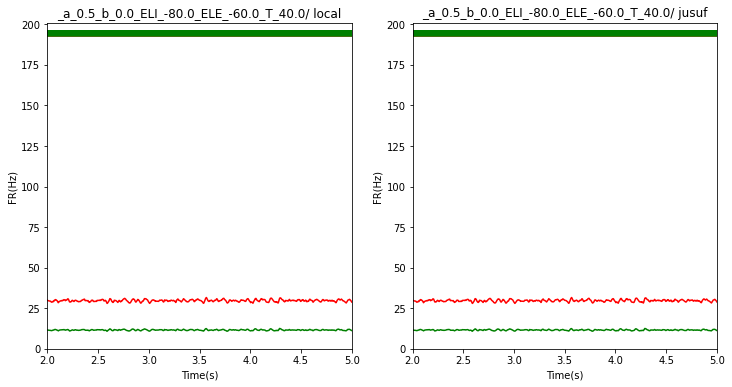

3.507908781524956e-11
2.825415034181096e-08


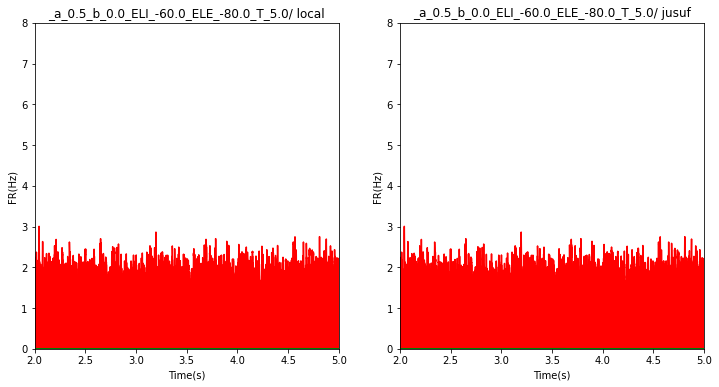

2.6995786792246516e-10
3.519808466911911e-08


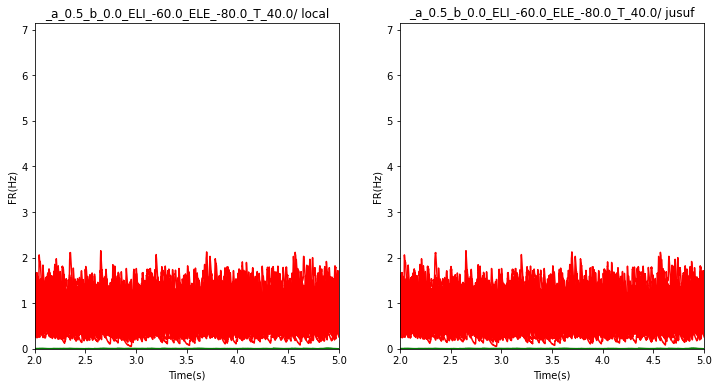

0.006819590840597689
0.018683458165276168


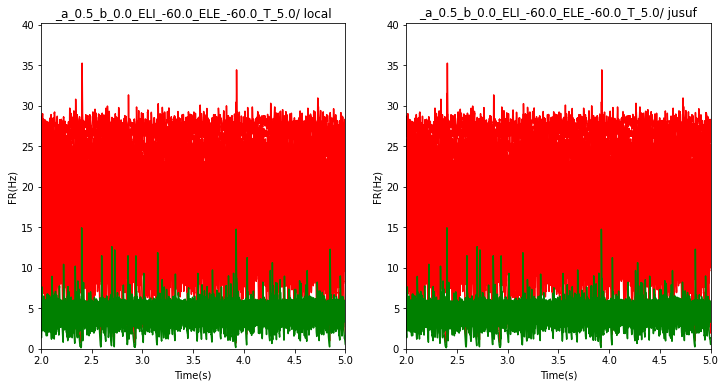

0.0009723341650369477
0.0026838707694238906


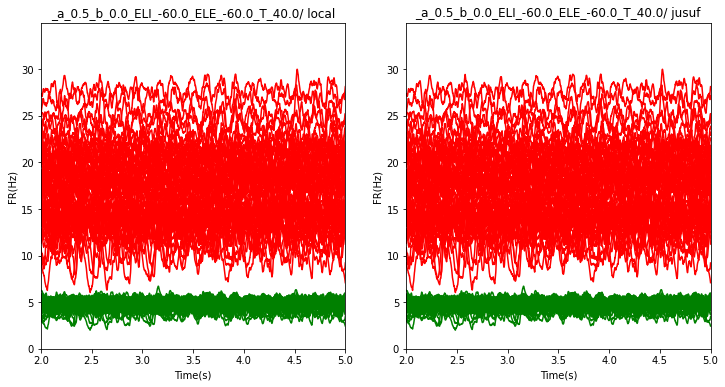

0.006469492546539366
0.015198057285539454


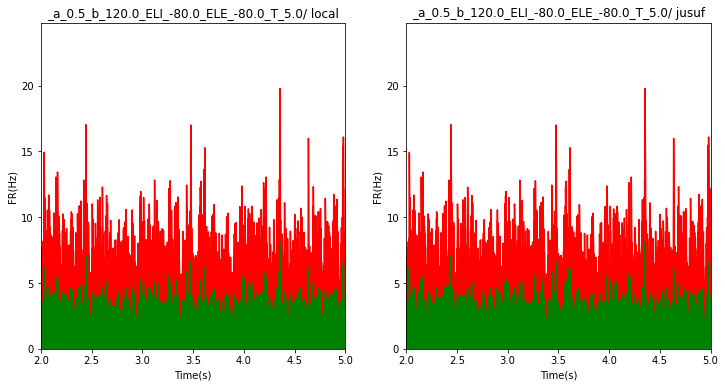

0.00010761607599671938
0.0002858041435396838


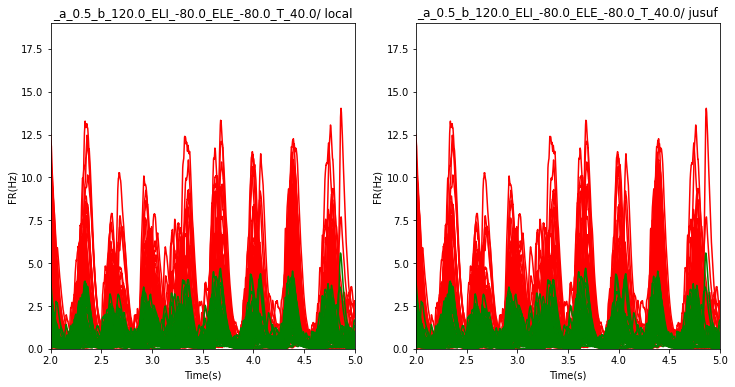

0.10268251576704104
0.25018909634779074


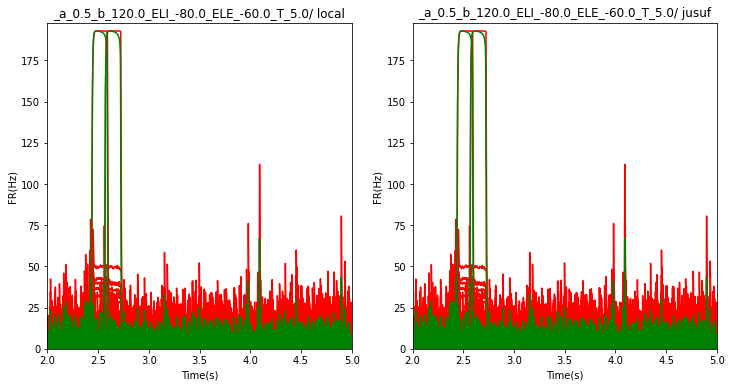

0.026055172747920793
0.05640360204537371


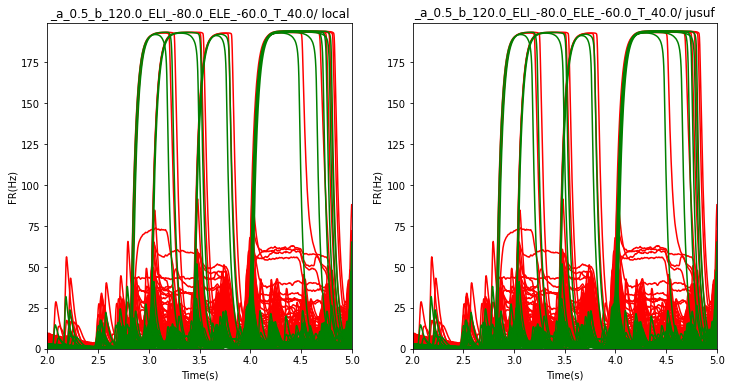

3.4662422136707677e-11
2.8380515748651085e-08


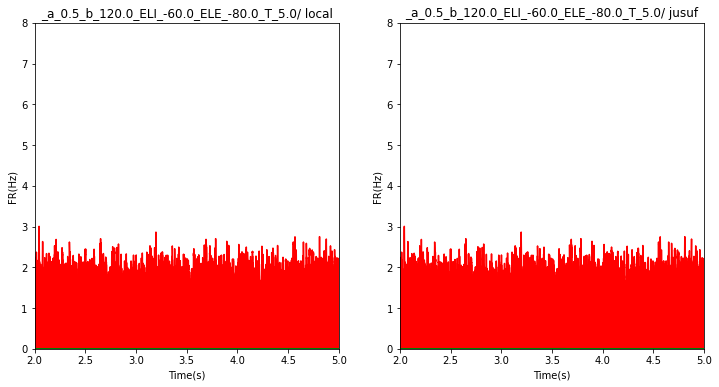

2.6868840614270996e-10
3.504375823554229e-08


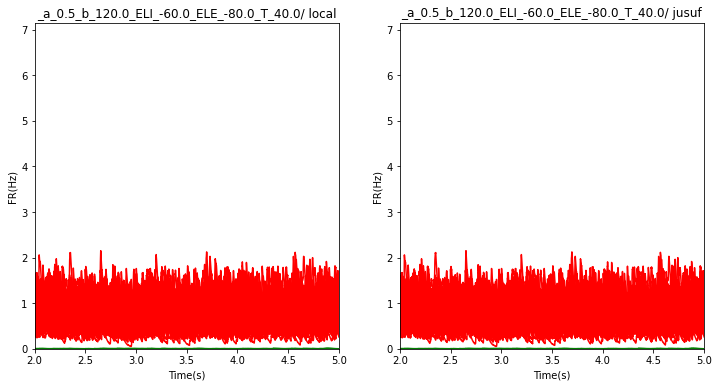

1.8942309924230567
6.59941298331604


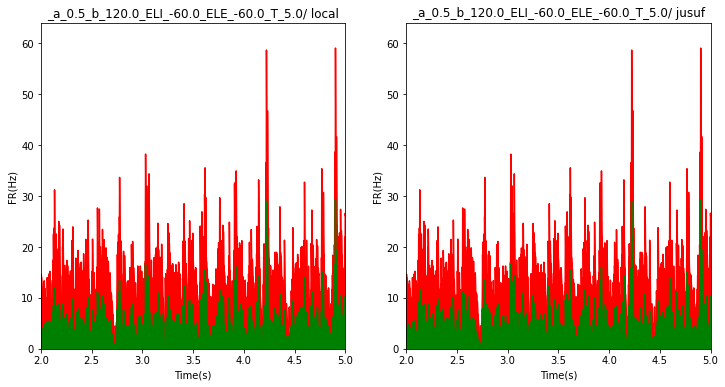

0.005883385823558221
0.018475107666216073


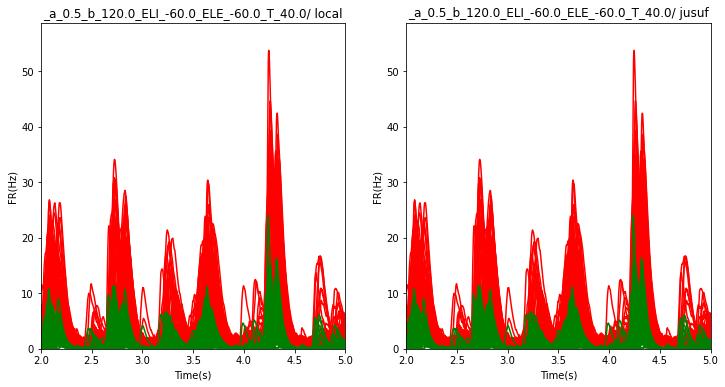

In [8]:
run_sim = 5000
cut_transient = 2000
steps = 2
S_vals = np.linspace(0, 0.5, steps)
b_vals = np.linspace(0, 120, steps)
E_L_e_vals = np.linspace(-80, -60, steps)
E_L_i_vals = np.linspace(-80, -60, steps)
T_vals = np.linspace(5, 40, steps)

S_vals = list(S_vals)
b_vals = list(b_vals)
E_L_i_vals = list(E_L_i_vals)
E_L_e_vals = list(E_L_e_vals)
T_vals = list(T_vals)

lst = [S_vals, b_vals, E_L_i_vals, E_L_e_vals, T_vals]

Job_proc = np.array(list(itertools.product(*lst)))

for simnum in range(len(Job_proc)):

    label_sim = '_a_' + str(Job_proc[simnum][0]) + '_b_' + str(Job_proc[simnum][1]) + '_ELI_' + \
                str(Job_proc[simnum][2]) + '_ELE_' + str(Job_proc[simnum][3]) + '_T_' + \
                str(Job_proc[simnum][4]) + '/'
    
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    
    file_name = folder_root_local + label_sim
    ax = axes[0]
    result = tools.get_result(file_name,cut_transient,run_sim)
    time_s = result[0][0]*1e-3 #from ms to sec
    FR_exc = result[0][1][:,0,:]*1e3 # from KHz to Hz; Excitatory firing rate
    FR_inh = result[0][1][:,1,:]*1e3 # from KHz to Hz; Inhibitory firing rate

    ax.plot(time_s, FR_inh, label=r'$v_i$', c='r')
    ax.plot(time_s, FR_exc, label=r'$v_e$', c='g')
    ax.set(title=label_sim + ' local', xlabel='Time(s)', ylabel='FR(Hz)',
           xlim=(2, 5), ylim=(0, 5 + max([np.amax(FR_exc), np.amax(FR_inh)])))
    
    file_name = folder_root_jusuf + label_sim
    result = tools.get_result(file_name,cut_transient,run_sim)
    time_s = result[0][0]*1e-3 #from ms to sec
    FR_exc_jusuf = result[0][1][:,0,:]*1e3 # from KHz to Hz; Excitatory firing rate
    FR_inh_jusuf = result[0][1][:,1,:]*1e3 # from KHz to Hz; Inhibitory firing rate
    
    axes[1].plot(time_s, FR_inh_jusuf, label=r'$v_i$', c='r')
    axes[1].plot(time_s, FR_exc_jusuf, label=r'$v_e$', c='g')
    axes[1].set(title=label_sim + ' jusuf', xlabel='Time(s)', ylabel='FR(Hz)',
           xlim=(2, 5), ylim=(0, 5 + max([np.amax(FR_exc_jusuf), np.amax(FR_inh_jusuf)])))
    
    print(np.sum(np.abs(FR_exc - FR_exc_jusuf)))
    print(np.sum(np.abs(FR_inh - FR_inh_jusuf)))
    plt.show()
    plt.close()

# Plot results

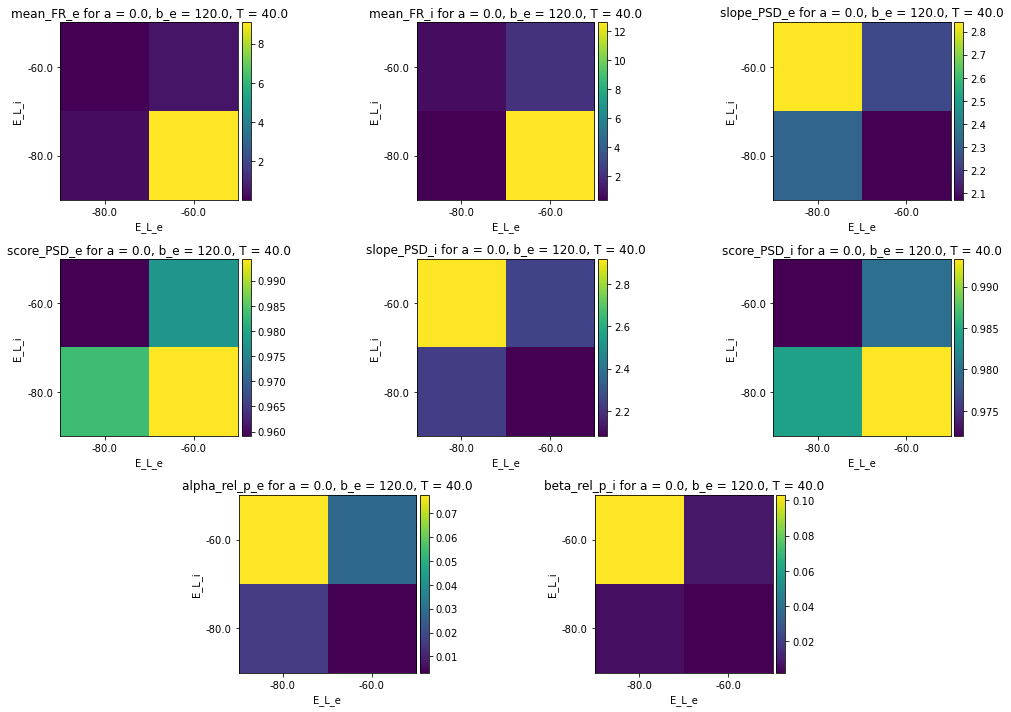

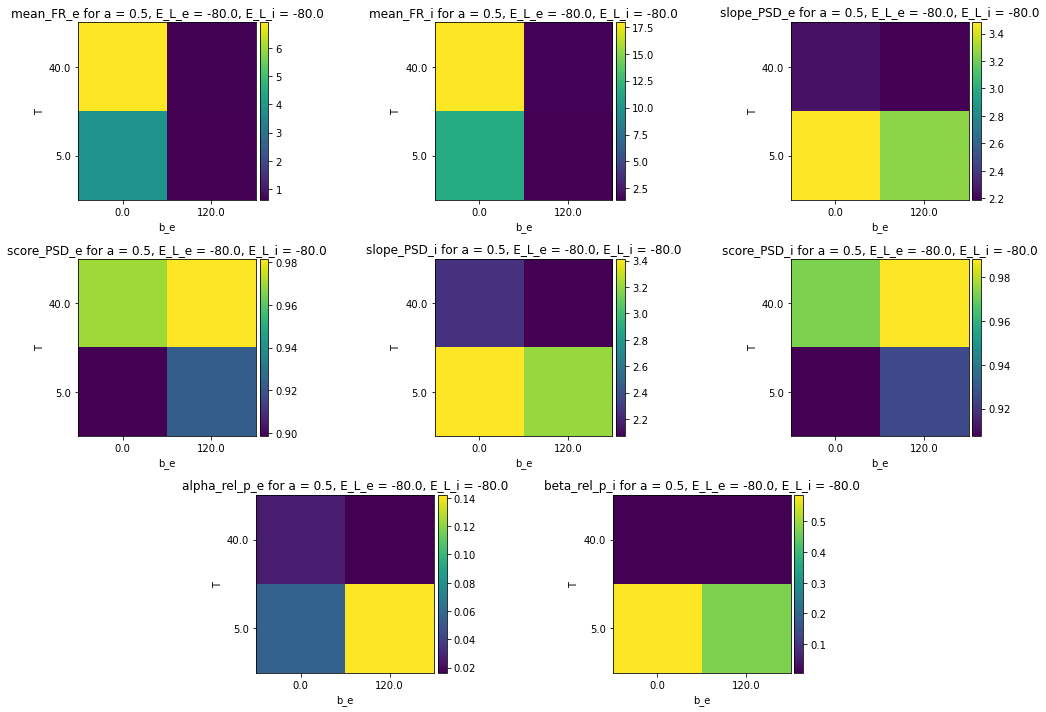

In [12]:
from processing_results import *

results_folder = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_jusuf'
batches_folder = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_jusuf_batches/'

batch_files(results_folder, batches_folder, batch_size=11, n_cols=41)

fixed_params = {'a': 0.25, 'b_e': 65, 'T': 30}
params_sweep = ('E_L_e', 'E_L_i')
steps = 2
metrics = ['mean_FR_e', 'mean_FR_i', 'slope_PSD_e', 'score_PSD_e', 'slope_PSD_i',
           'score_PSD_i', 'alpha_rel_p_e', 'beta_rel_p_i']
fig = plot_multiple_metrics(metrics, batches_folder, params_sweep, fixed_params, steps)
plt.show()


fixed_params = {'a': 0.5, 'E_L_e': -80, 'E_L_i': -80}
params_sweep = ('b_e', 'T')
steps = 2
metrics = ['mean_FR_e', 'mean_FR_i', 'slope_PSD_e', 'score_PSD_e', 'slope_PSD_i',
           'score_PSD_i', 'alpha_rel_p_e', 'beta_rel_p_i']
fig = plot_multiple_metrics(metrics, batches_folder, params_sweep, fixed_params, steps)
plt.show()